In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1391,2020-08-23,United Kingdom,324600.0,324601.0,41448.0,41423.0,-1.0,25.0
1392,2020-08-23,Germany,232097.0,232864.0,9273.0,9269.0,-767.0,4.0
1393,2020-08-23,Iran,358283.0,356792.0,20648.0,20502.0,1491.0,146.0
1394,2020-08-23,Turkey,256939.0,257032.0,6097.0,6102.0,-93.0,-5.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  6423.27005730659
RMSE =  25044.208938572658


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.352435530086
RMSE =  716.1240468171694


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  43198.54887218045
RMSE =  78131.64880411538
-- World performances for deaths --
MAE =  1596.5563909774437
RMSE =  1958.392581623868


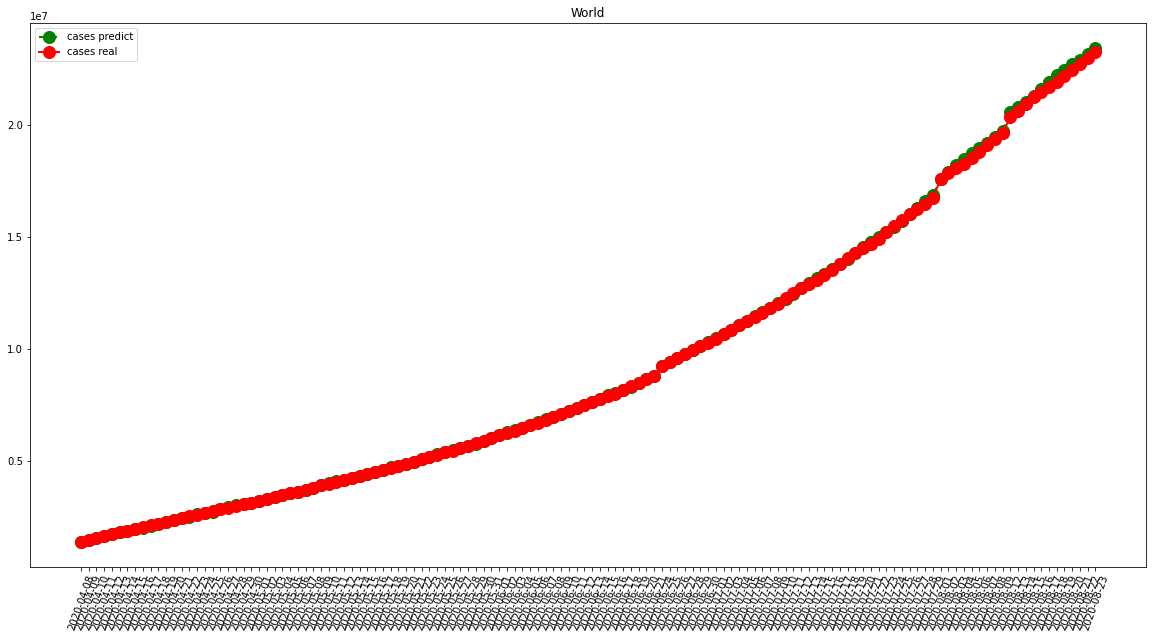

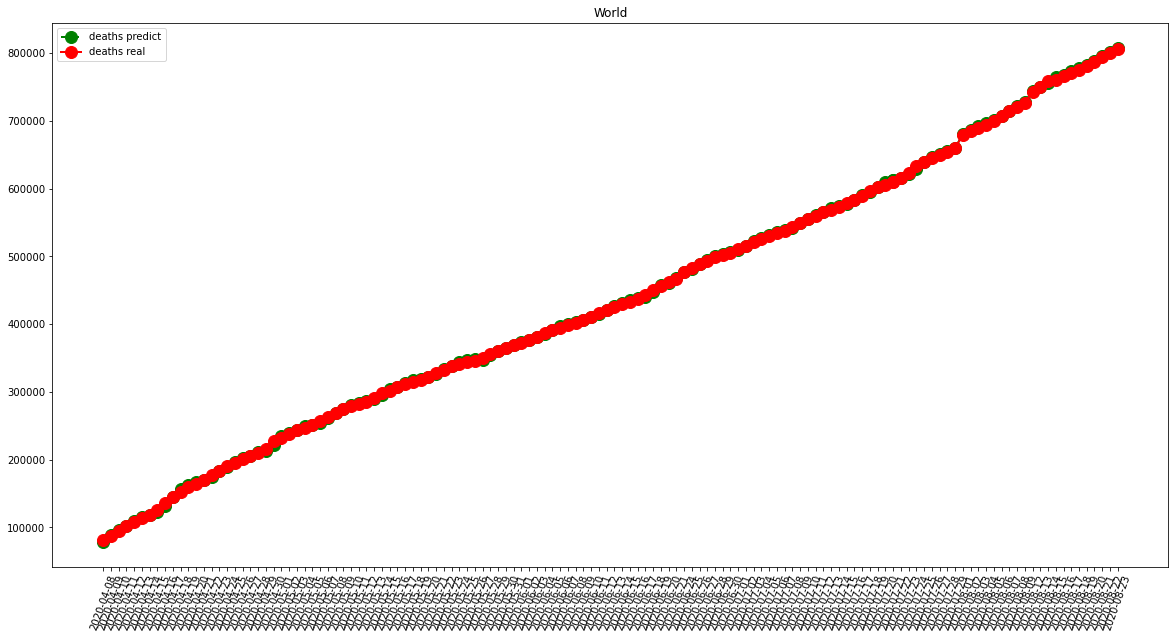

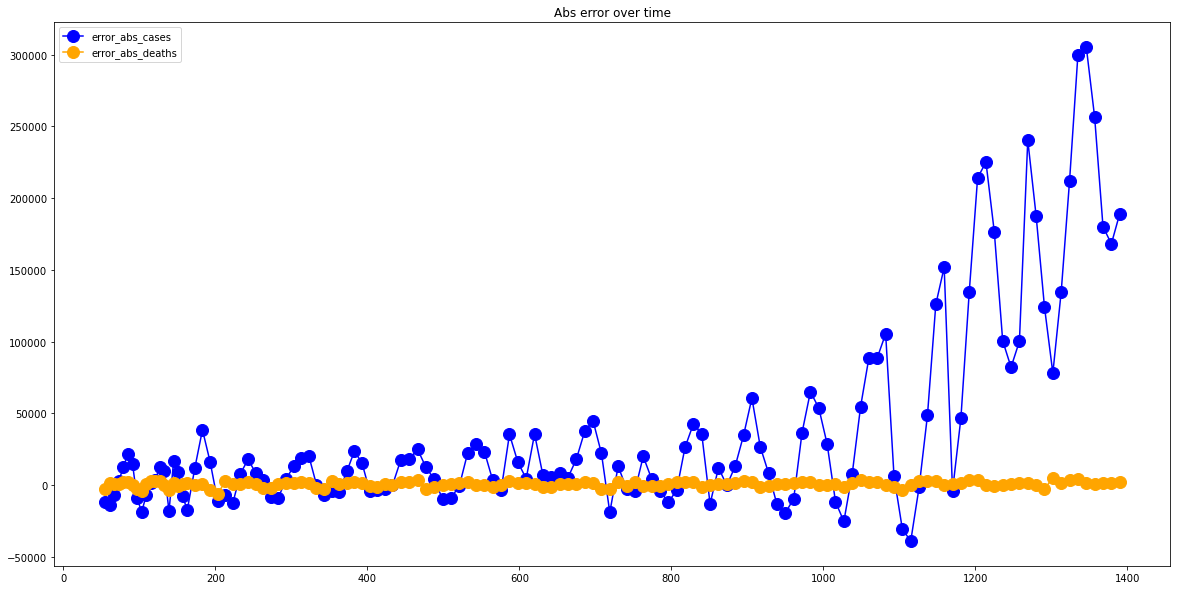

In [7]:
visShow("World")

-- France performances for cases --
MAE =  920.3216783216783
RMSE =  1402.9967626776322
-- France performances for deaths --
MAE =  129.28671328671328
RMSE =  280.4159996632376


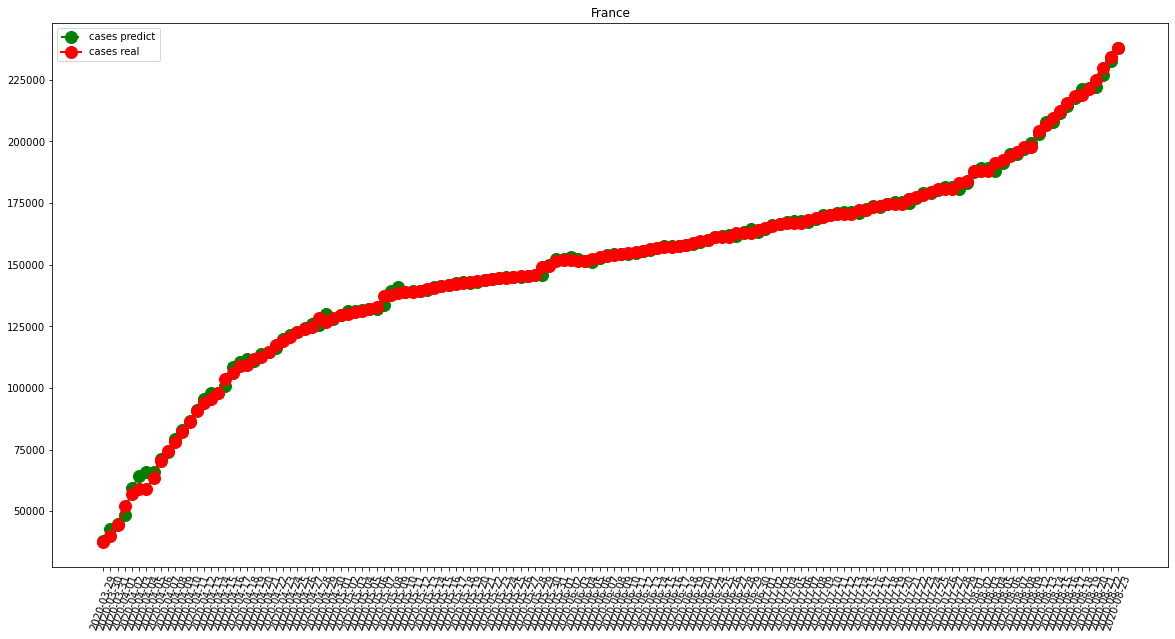

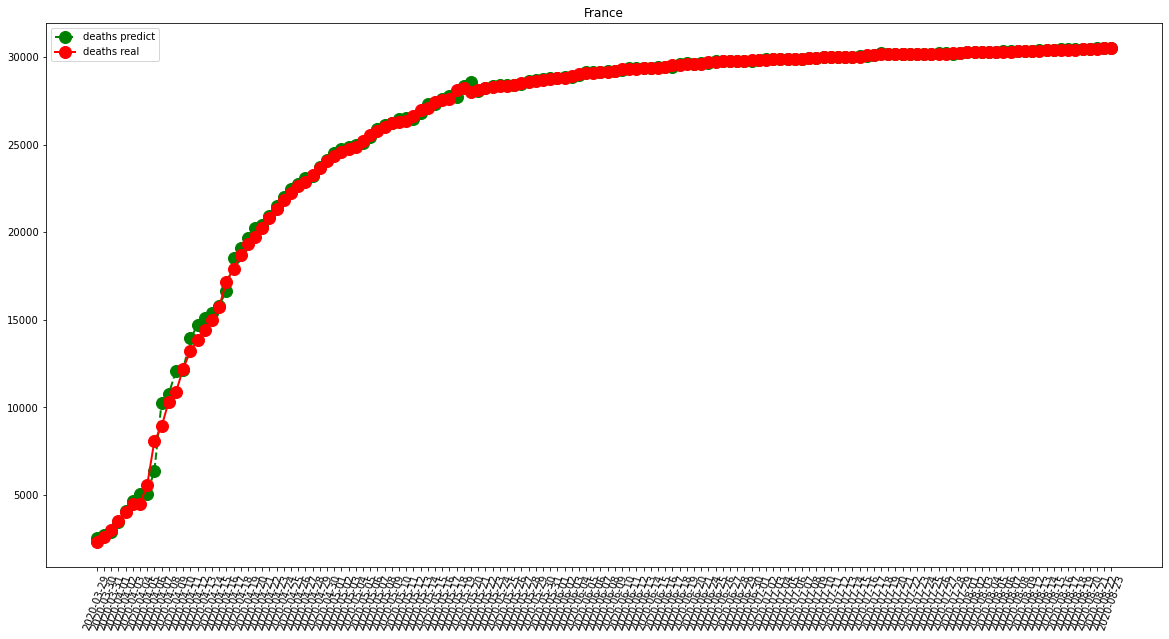

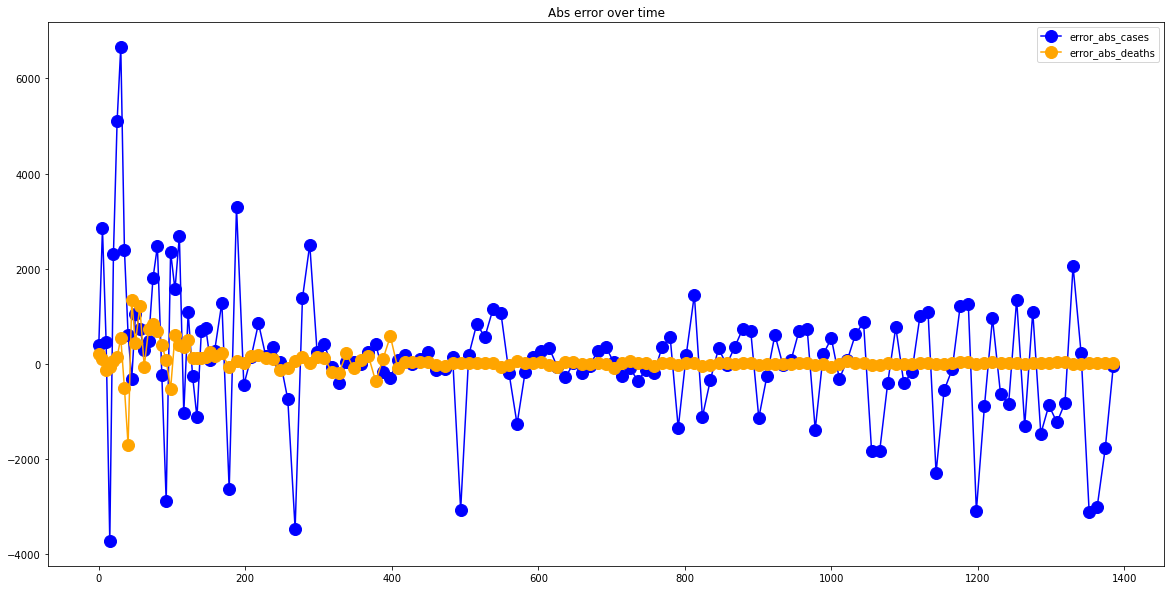

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.02797202797206
RMSE =  462.85486858261453
-- Italy performances for deaths --
MAE =  76.57342657342657
RMSE =  248.1800891356046


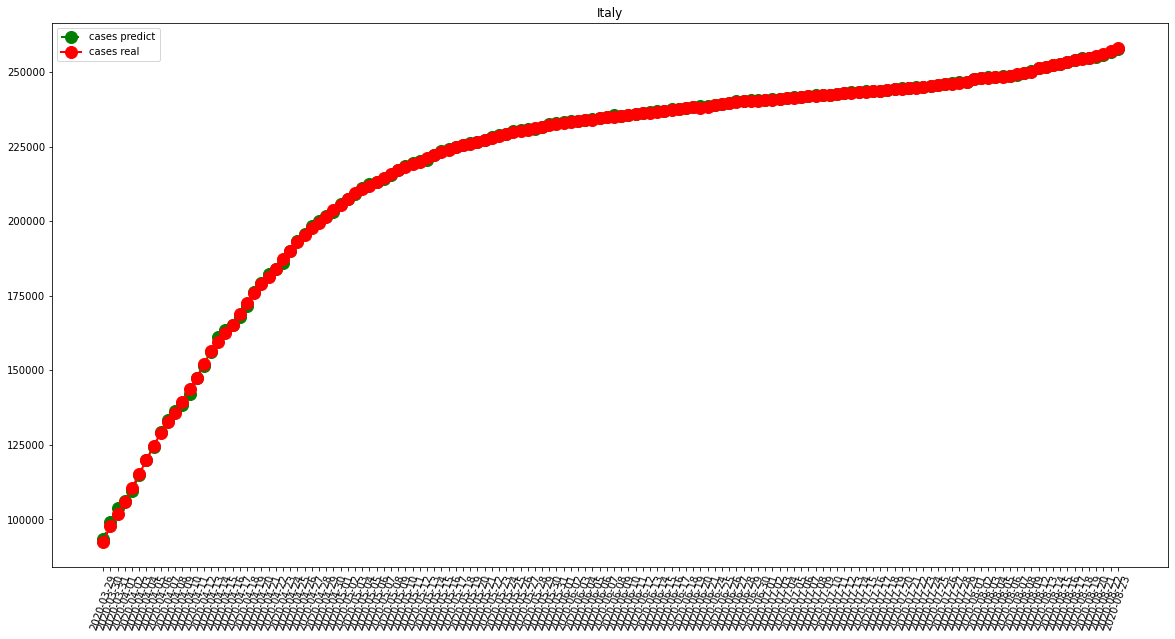

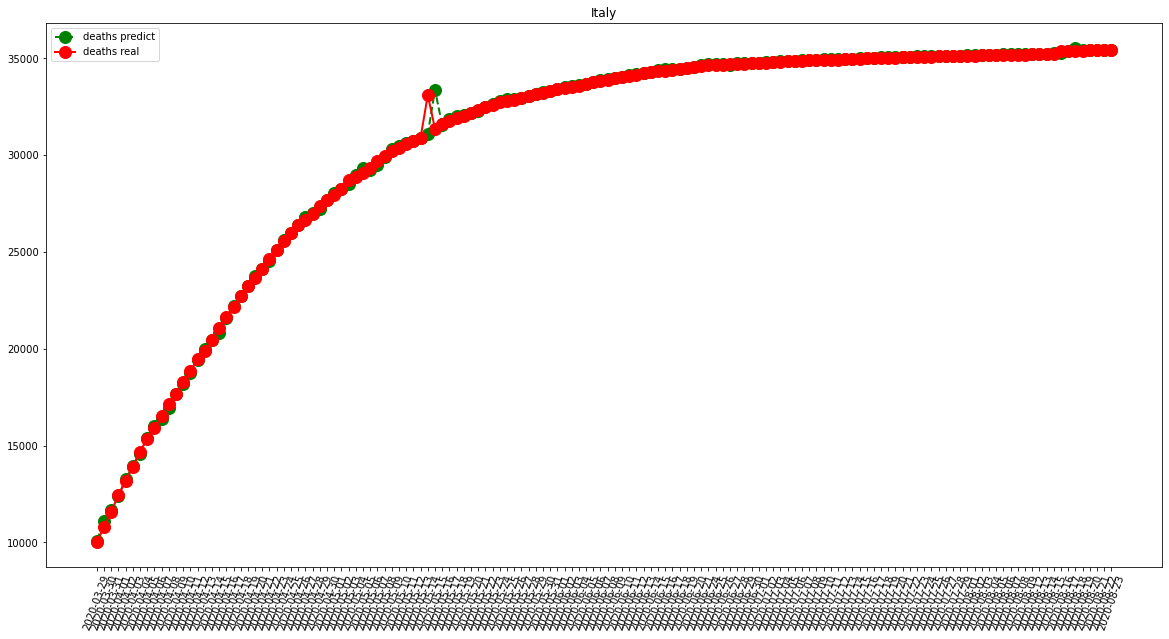

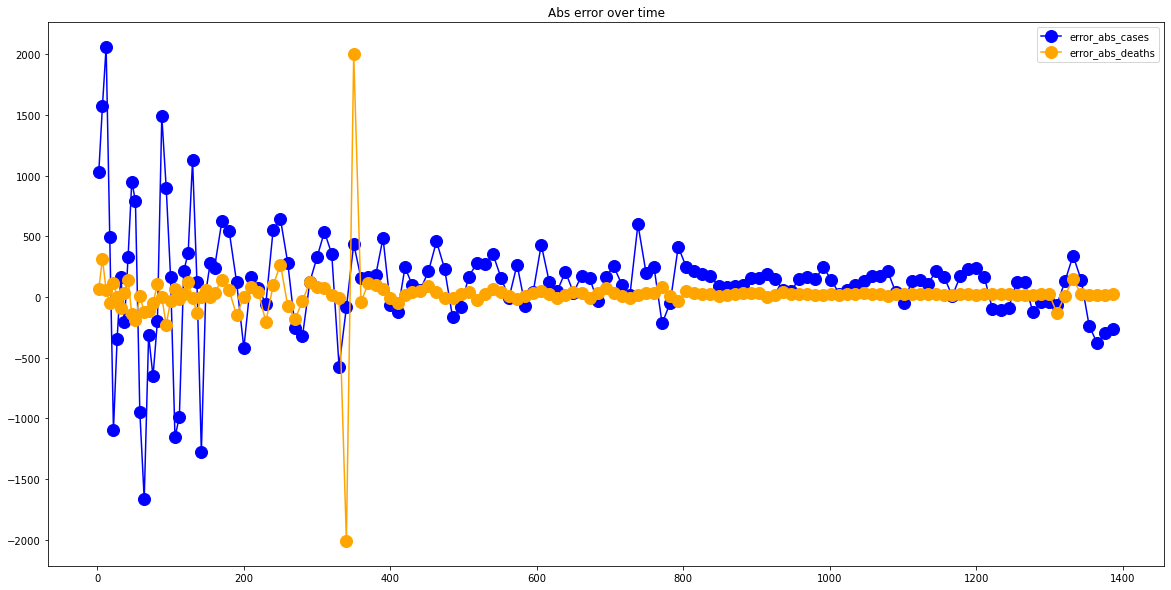

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1507.3286713286714
RMSE =  2833.9928441263646
-- Spain performances for deaths --
MAE =  132.35664335664336
RMSE =  339.70508600040927


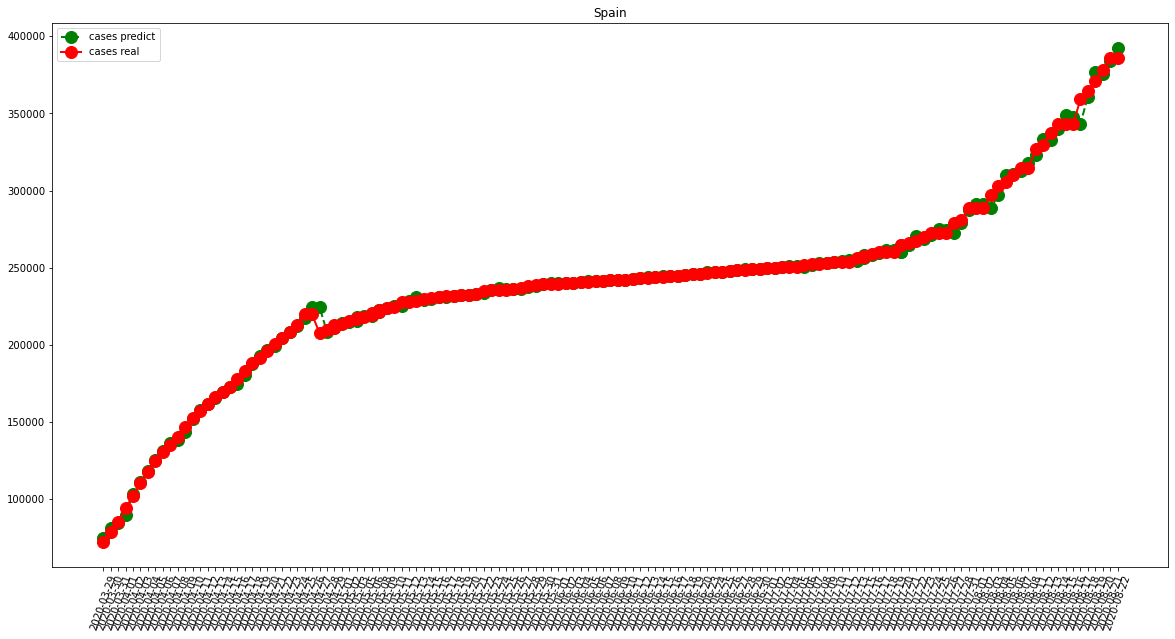

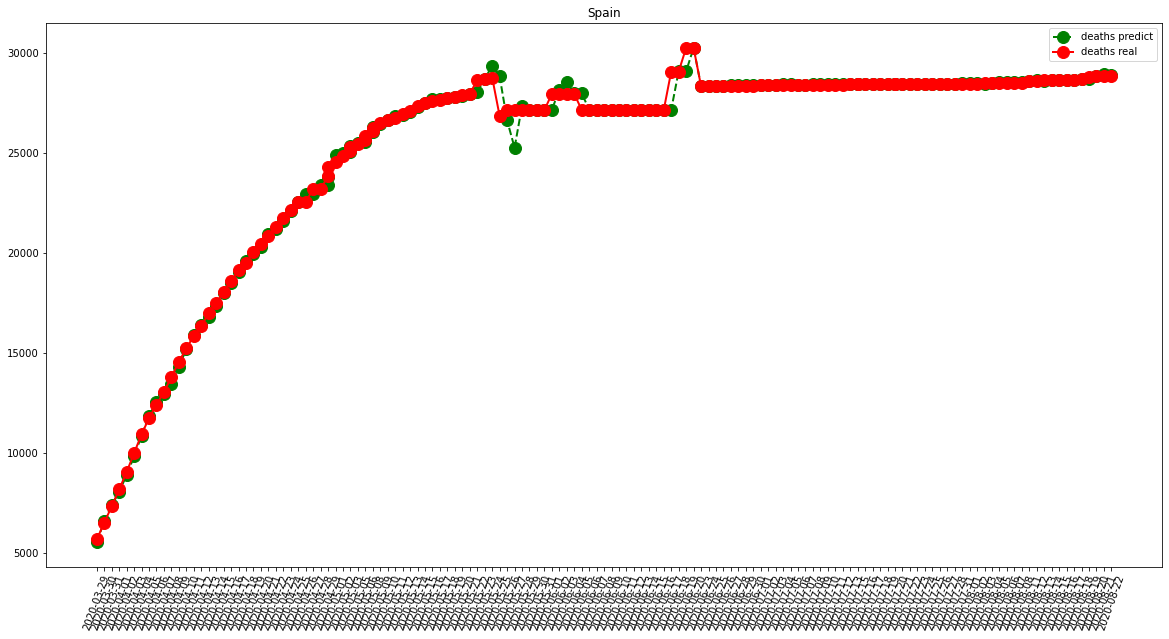

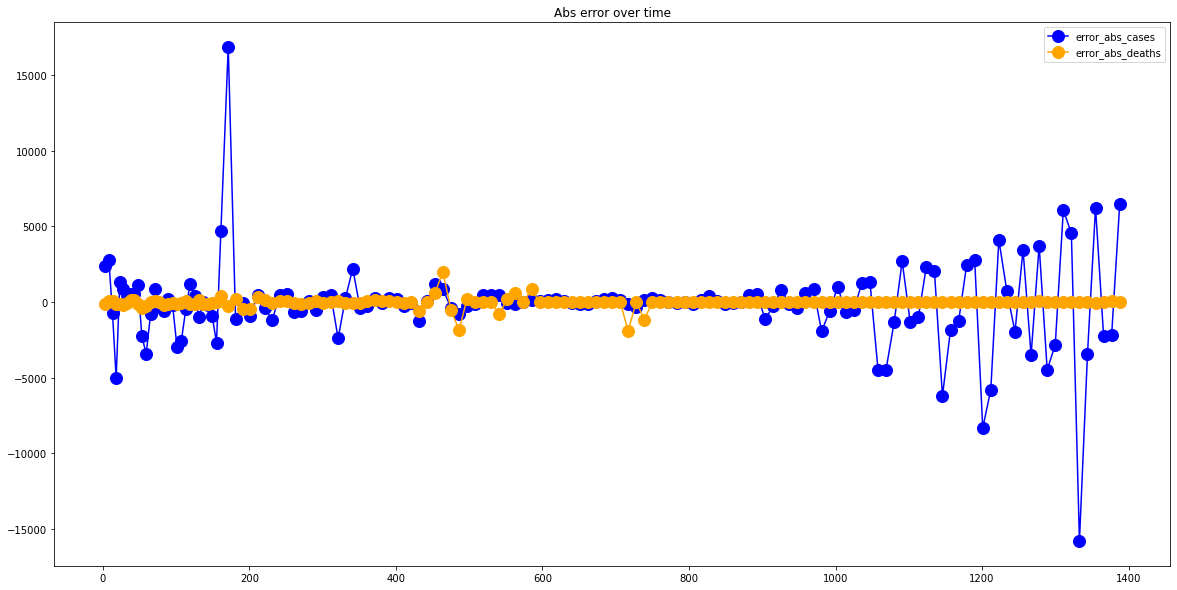

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  9925.706293706293
RMSE =  15537.243103097642
-- United States performances for deaths --
MAE =  490.8951048951049
RMSE =  700.7378329229202


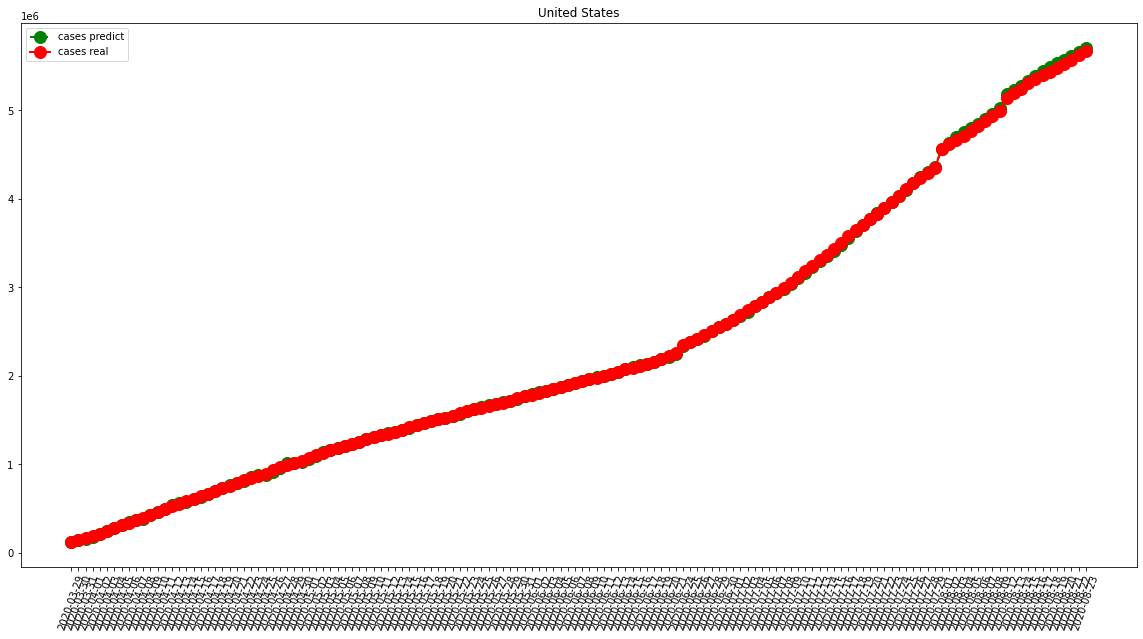

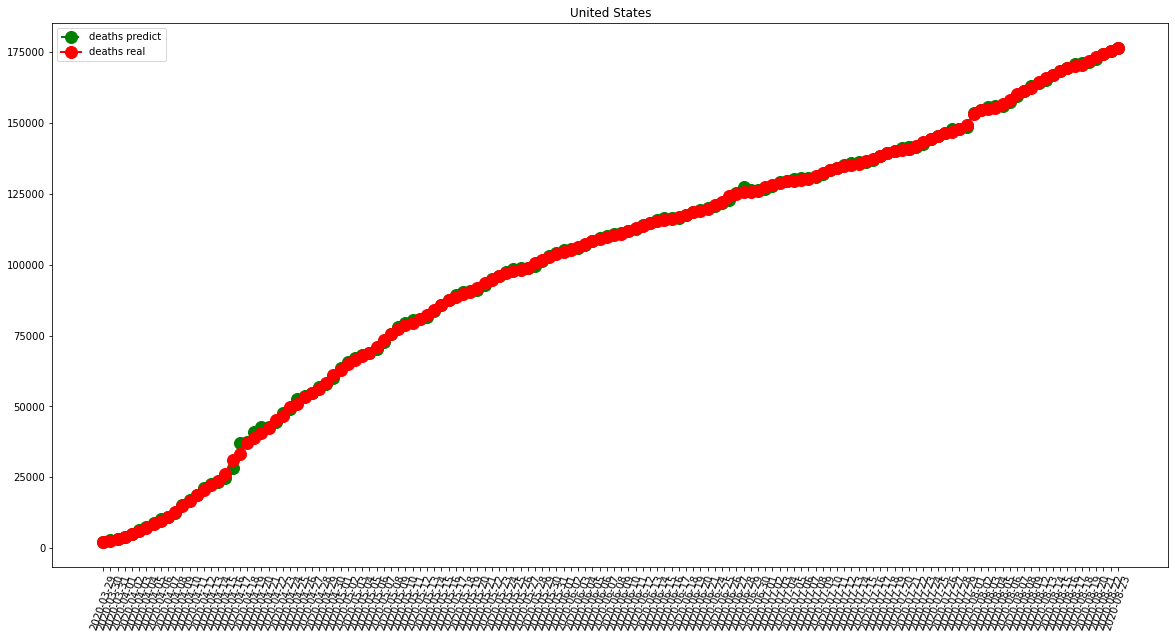

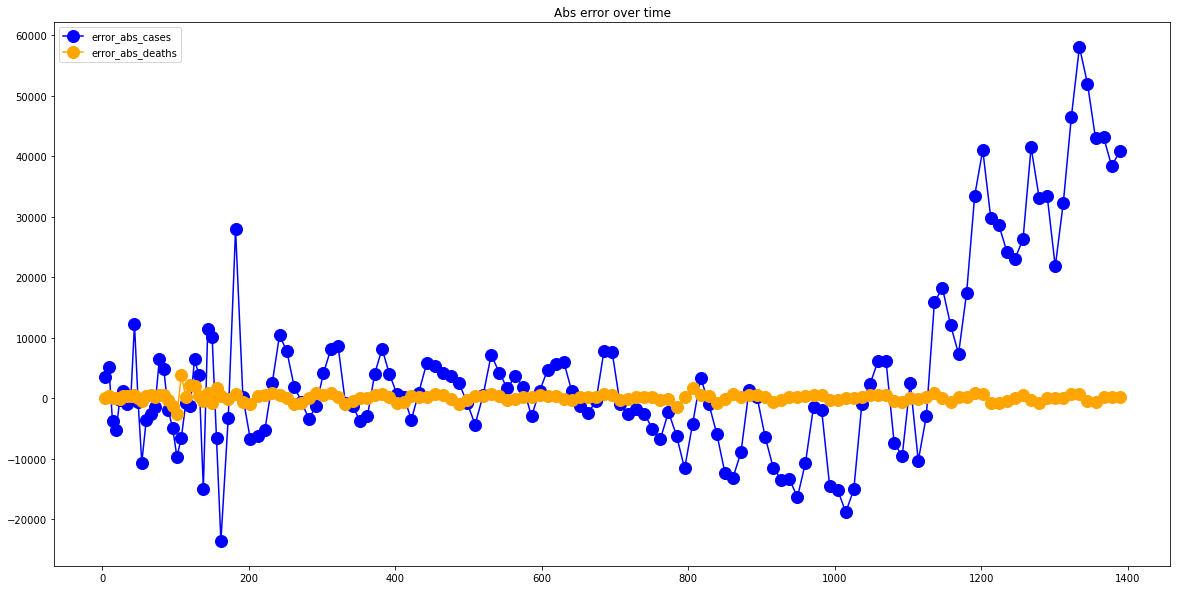

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  69.52447552447552
RMSE =  99.75459398433247
-- China performances for deaths --
MAE =  28.846153846153847
RMSE =  131.30243208459115


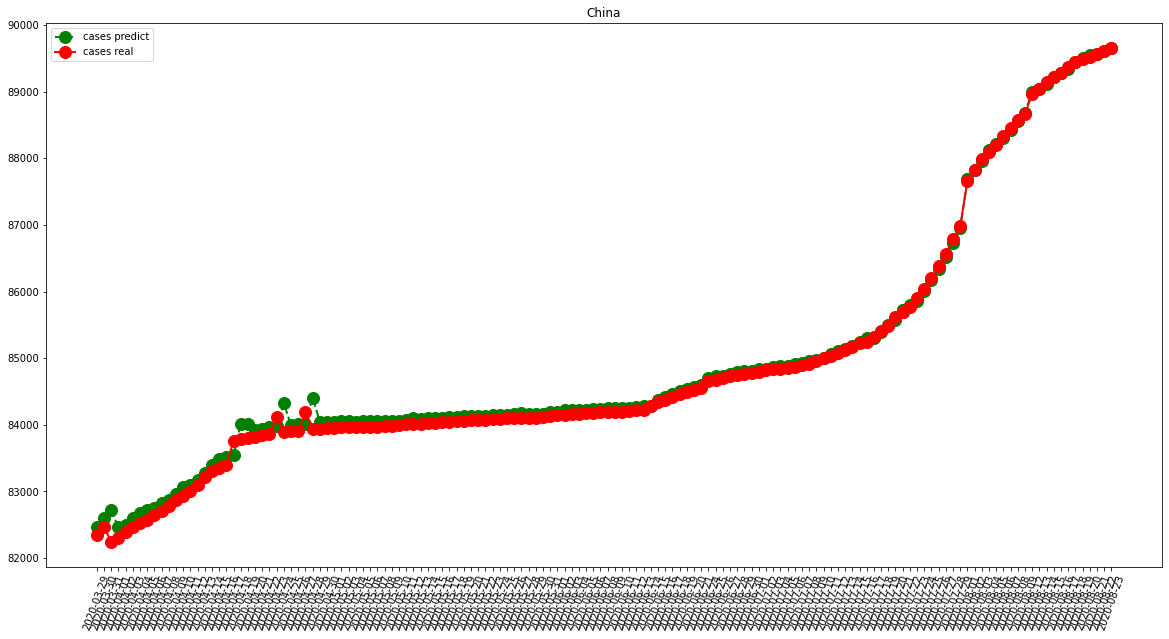

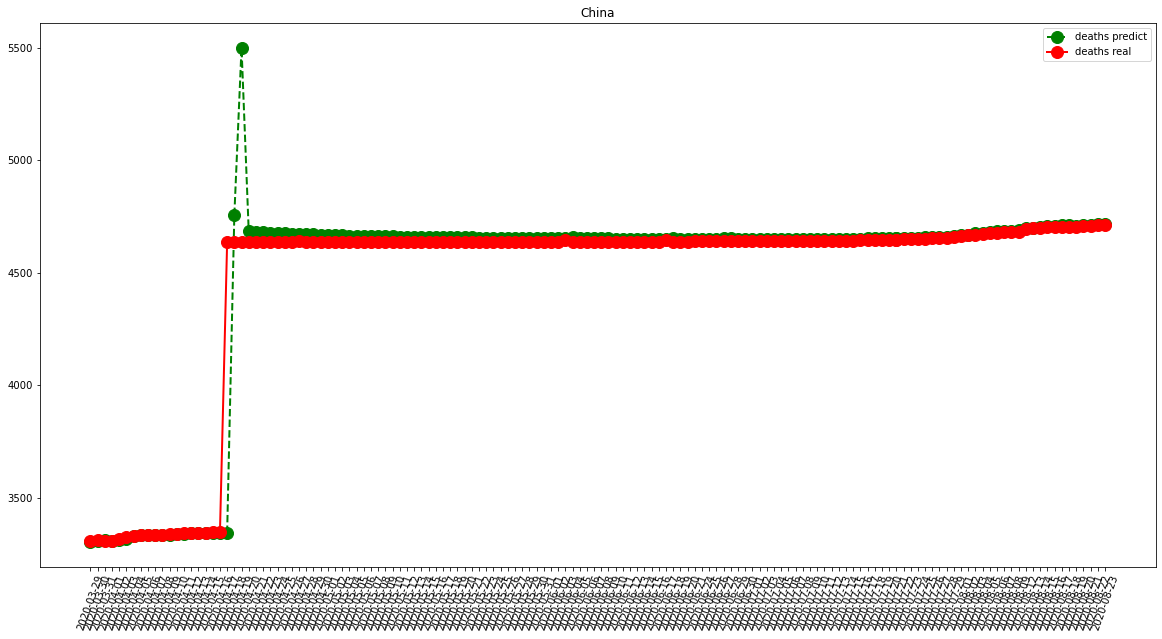

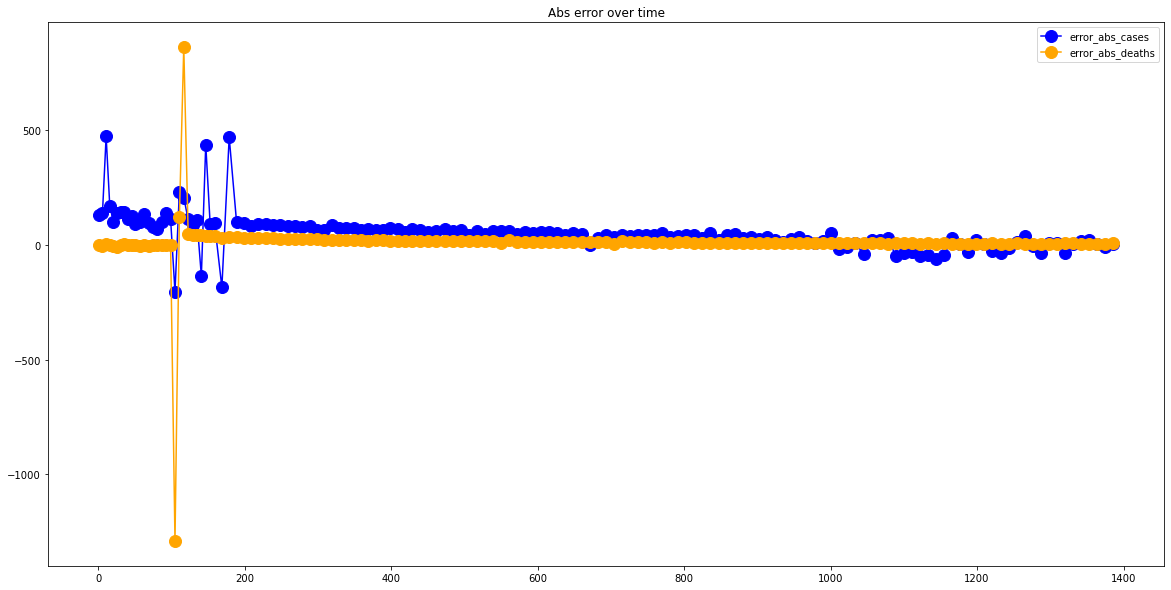

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1125.8608695652174
RMSE =  3898.4612549724975
-- United Kingdom performances for deaths --
MAE =  260.10434782608695
RMSE =  795.7425517688822


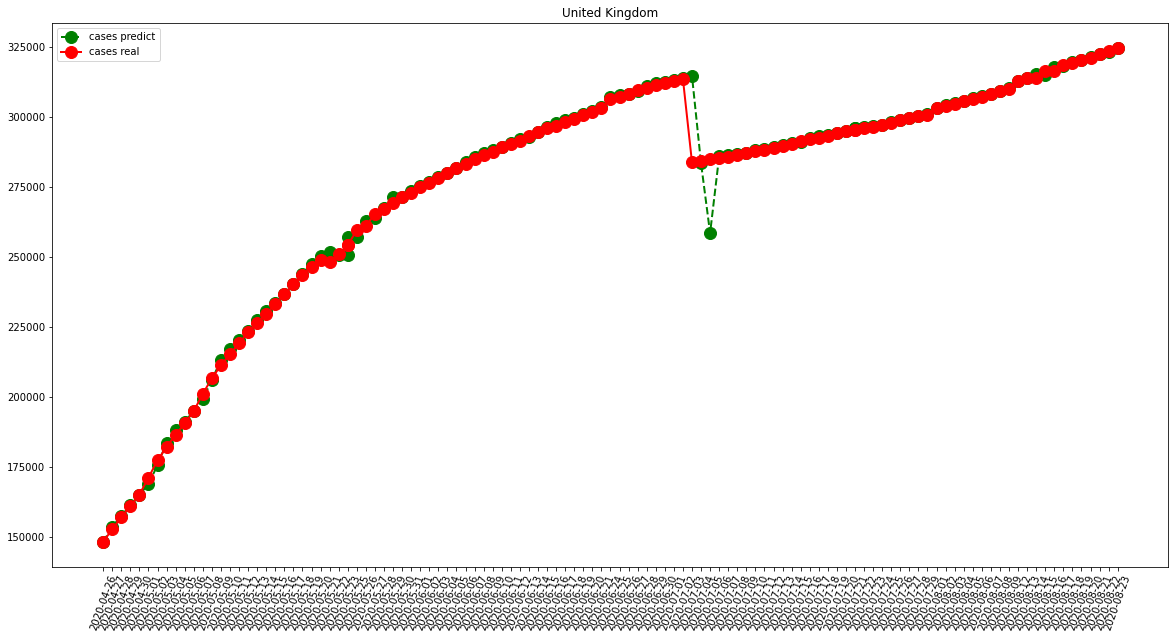

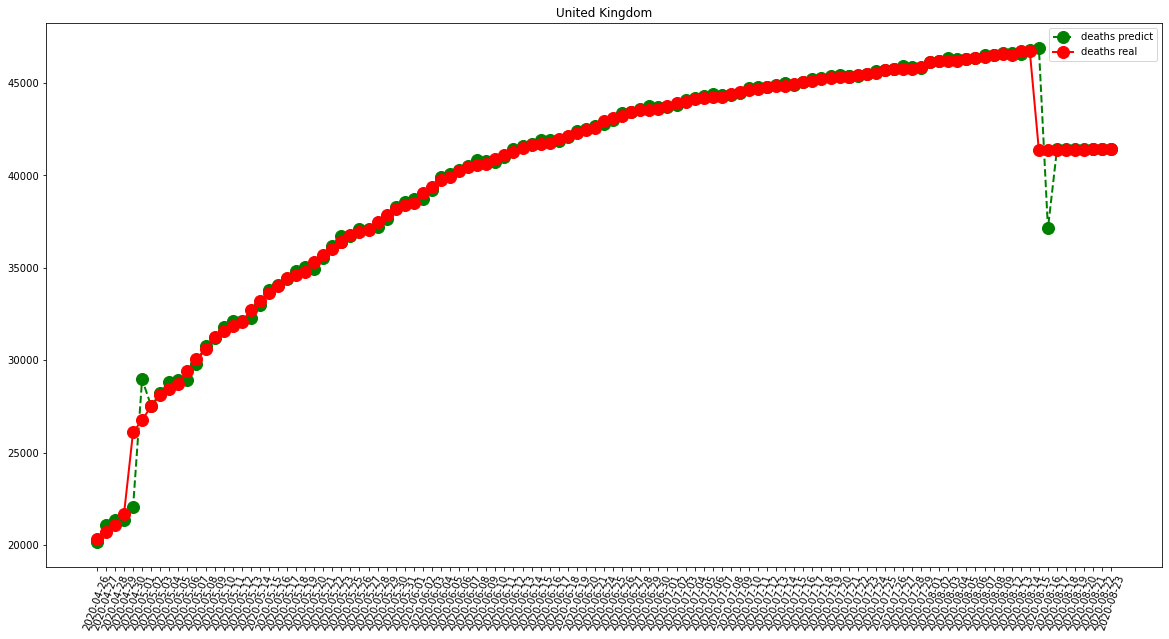

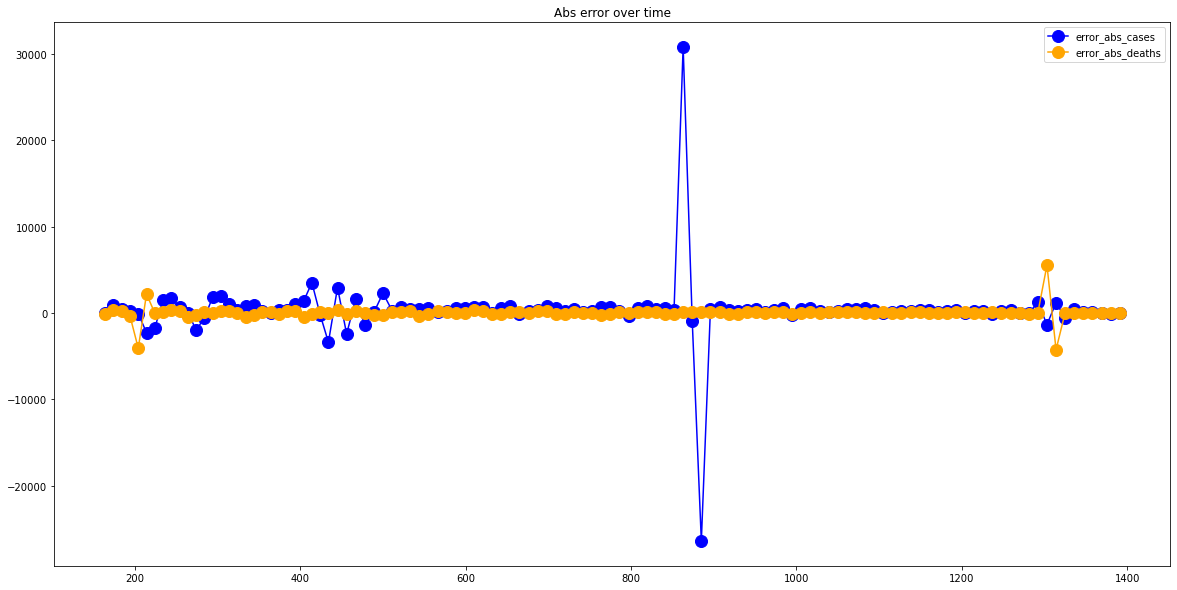

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  378.44347826086954
RMSE =  550.7260741018644
-- Germany performances for deaths --
MAE =  22.182608695652174
RMSE =  40.92910094722124


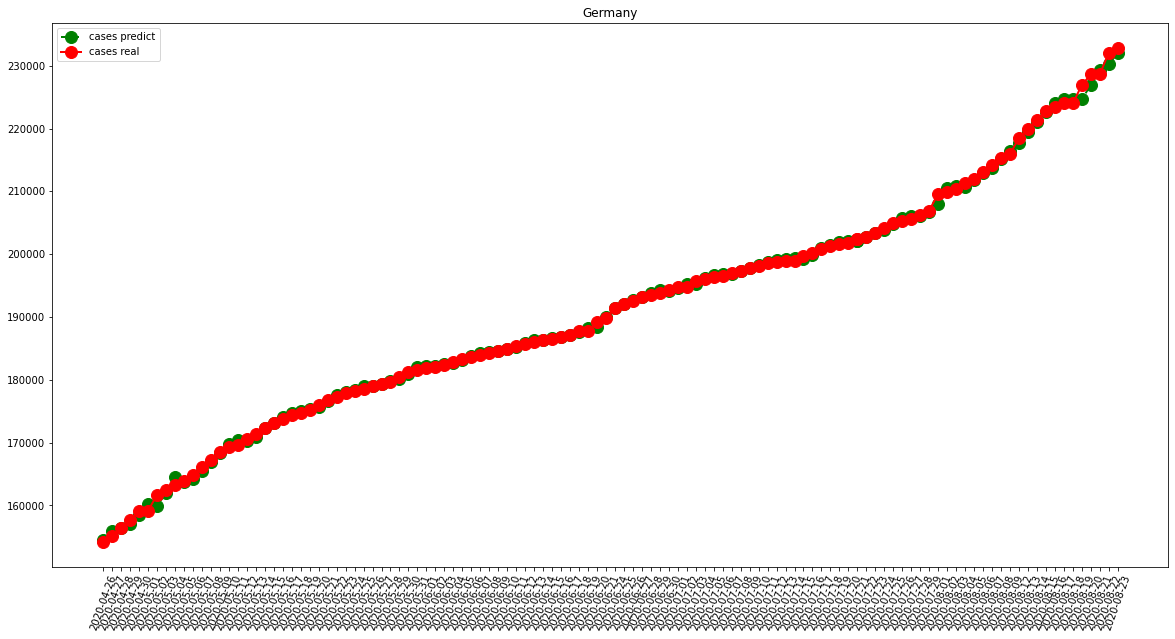

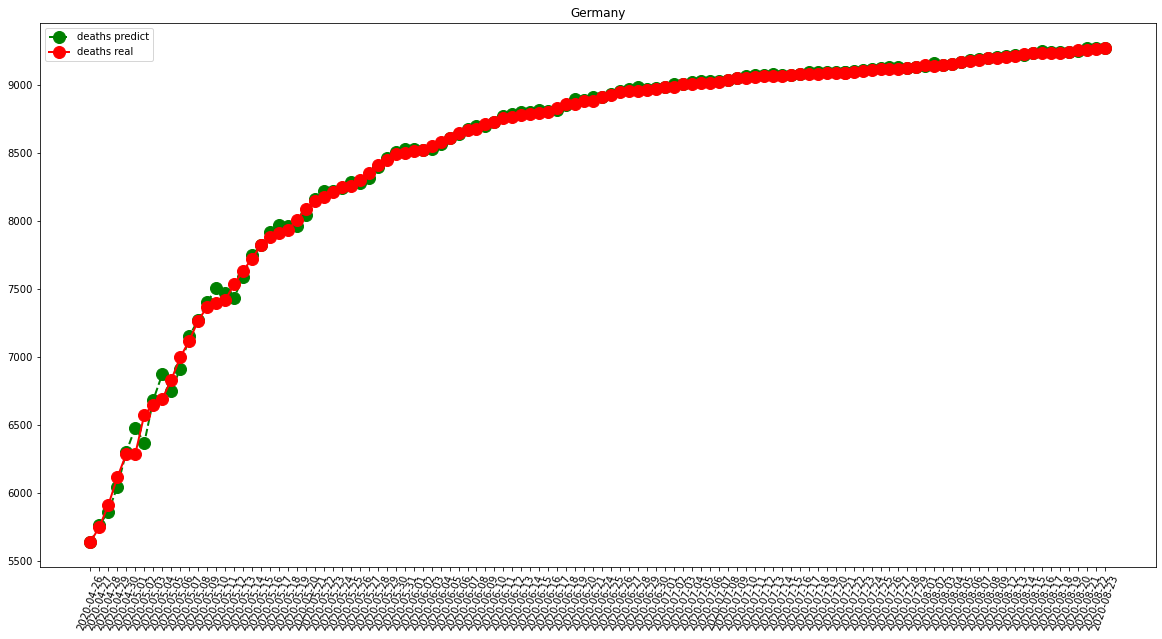

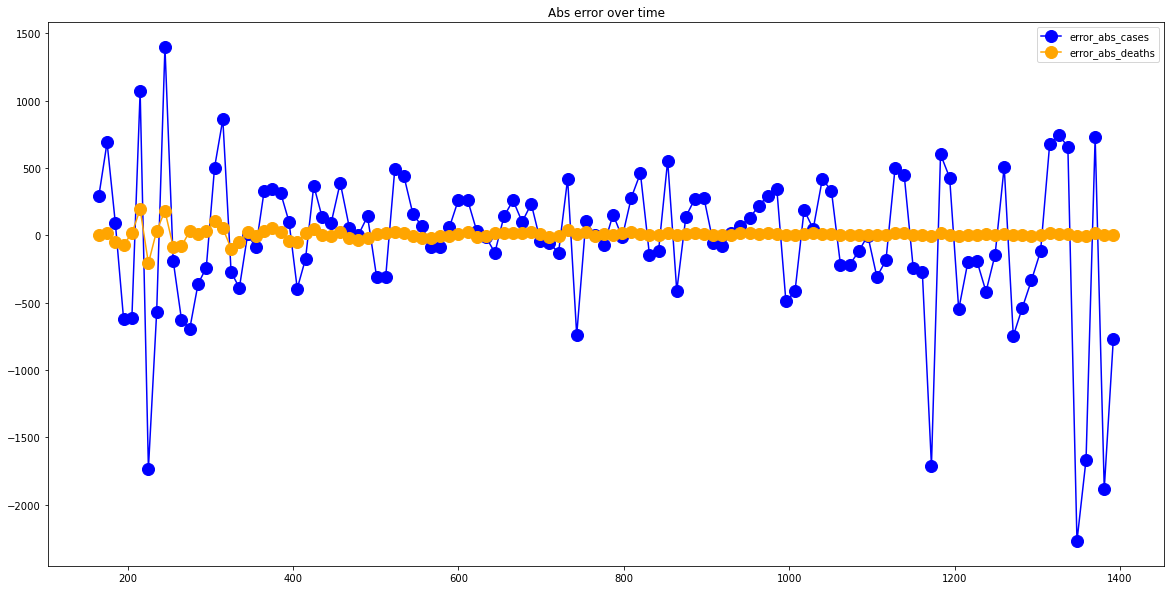

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  688.408695652174
RMSE =  1013.5211758582271
-- Iran performances for deaths --
MAE =  37.469565217391306
RMSE =  74.36531449540169


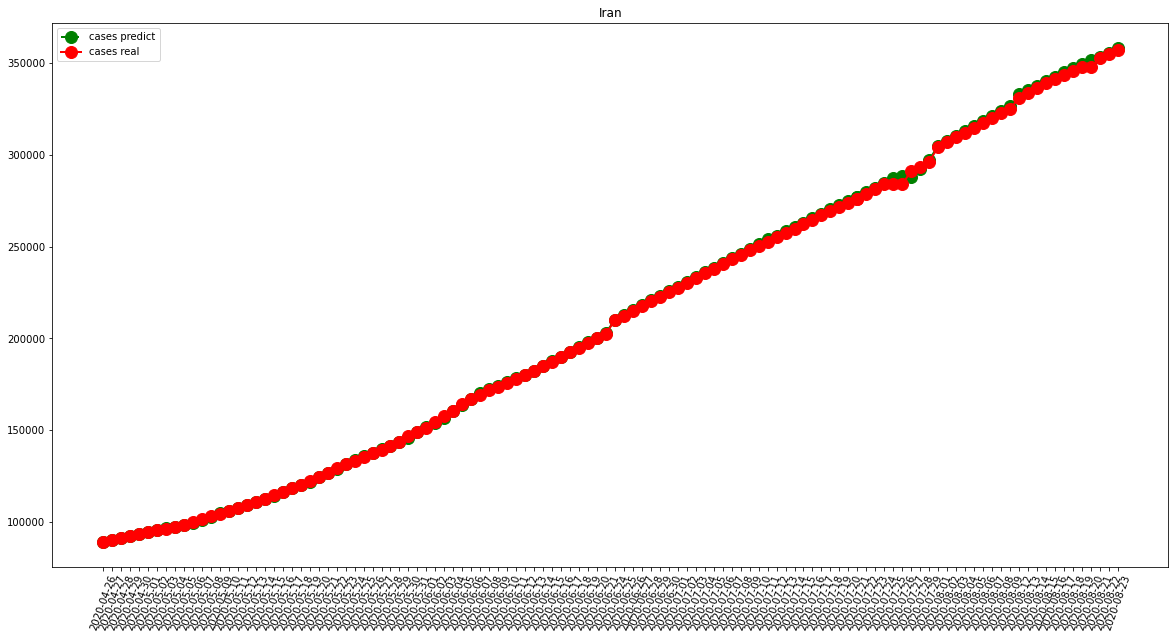

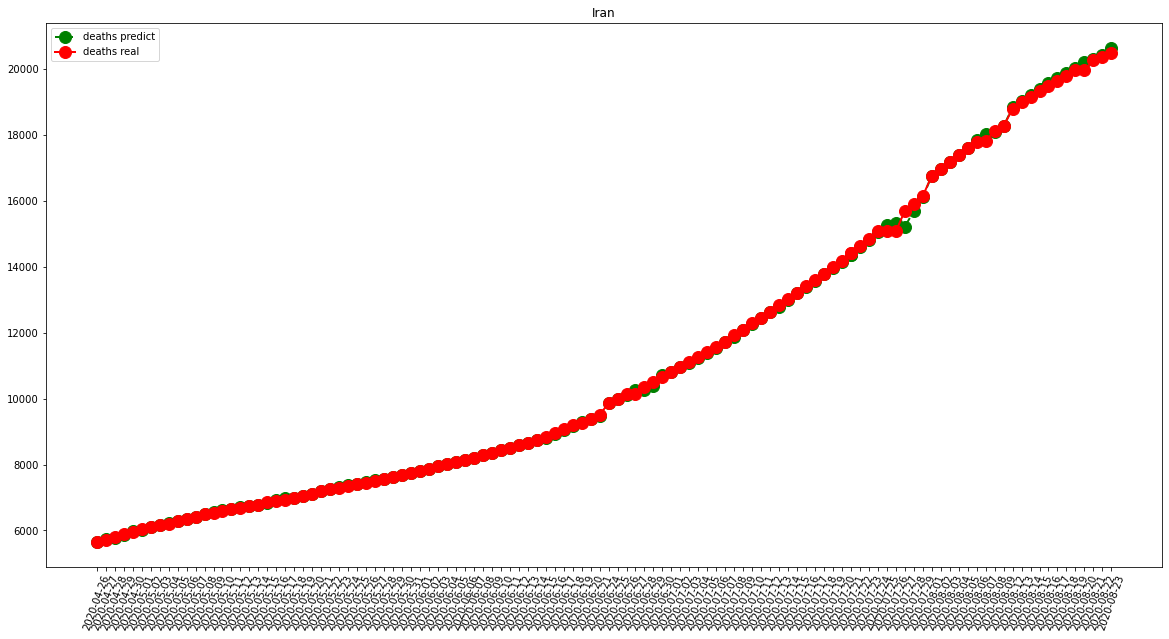

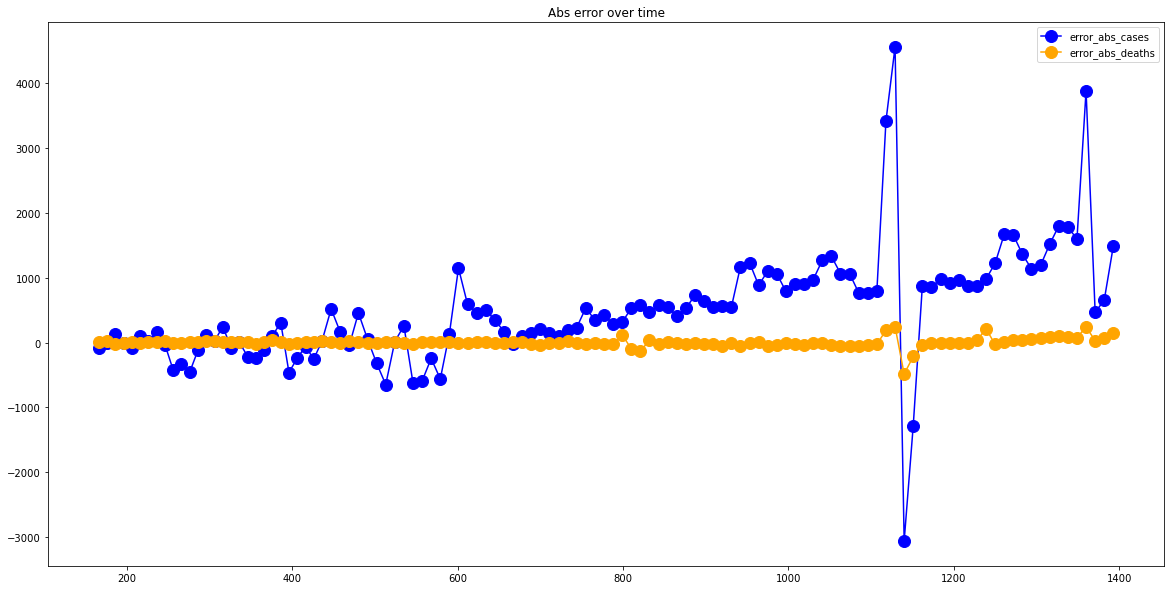

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.02608695652174
RMSE =  328.1501644594782
-- Turkey performances for deaths --
MAE =  16.91304347826087
RMSE =  94.6686211269973


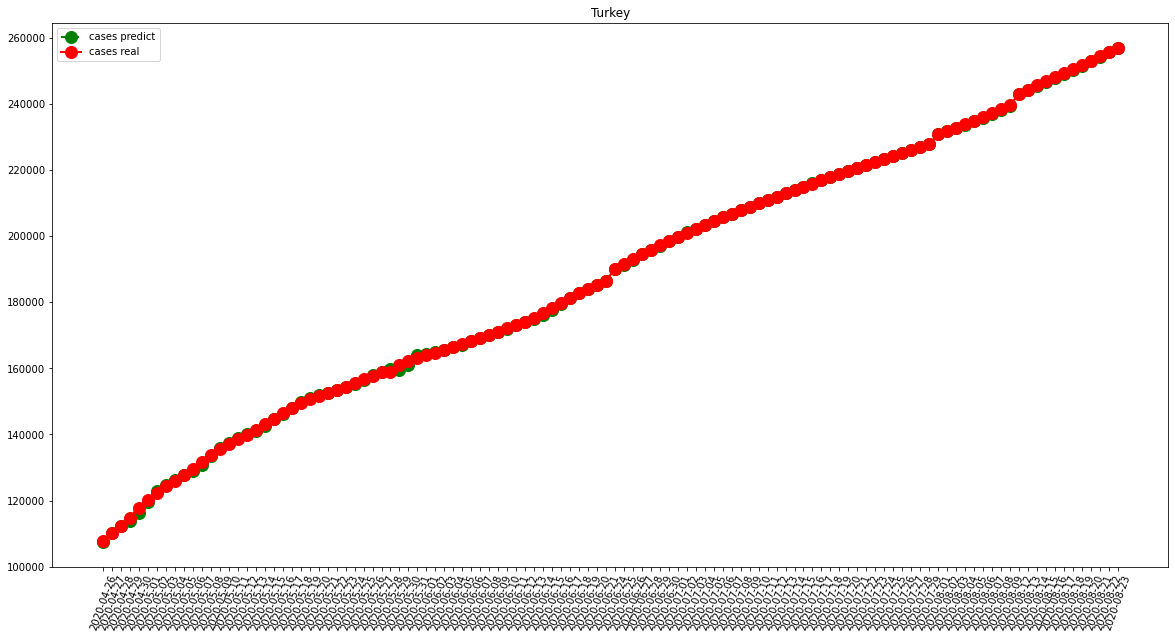

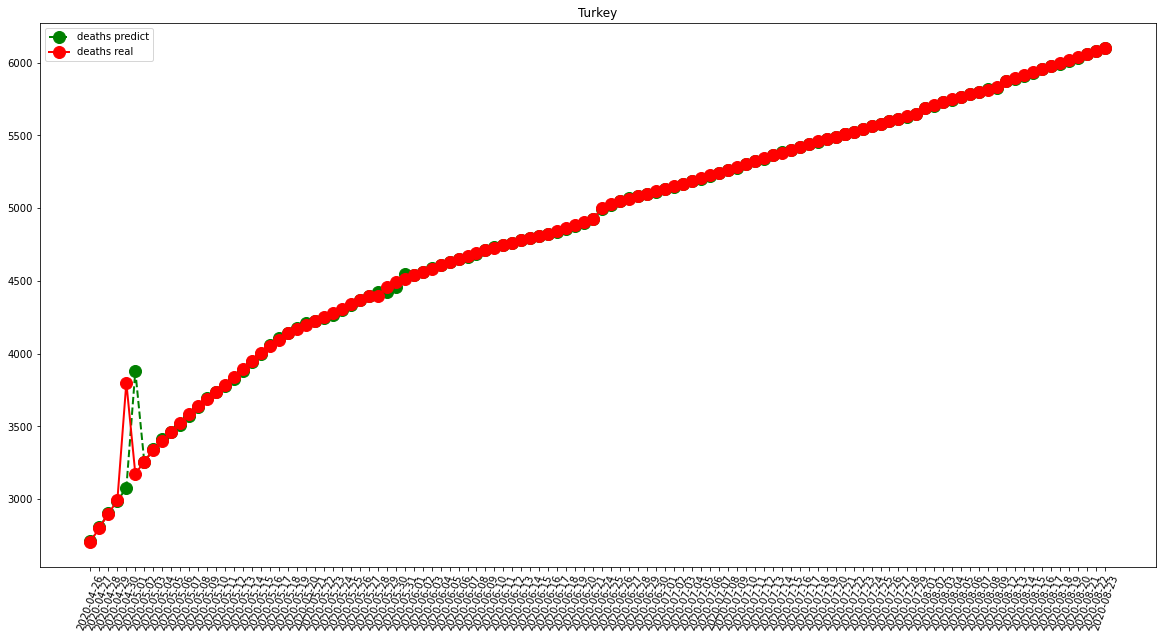

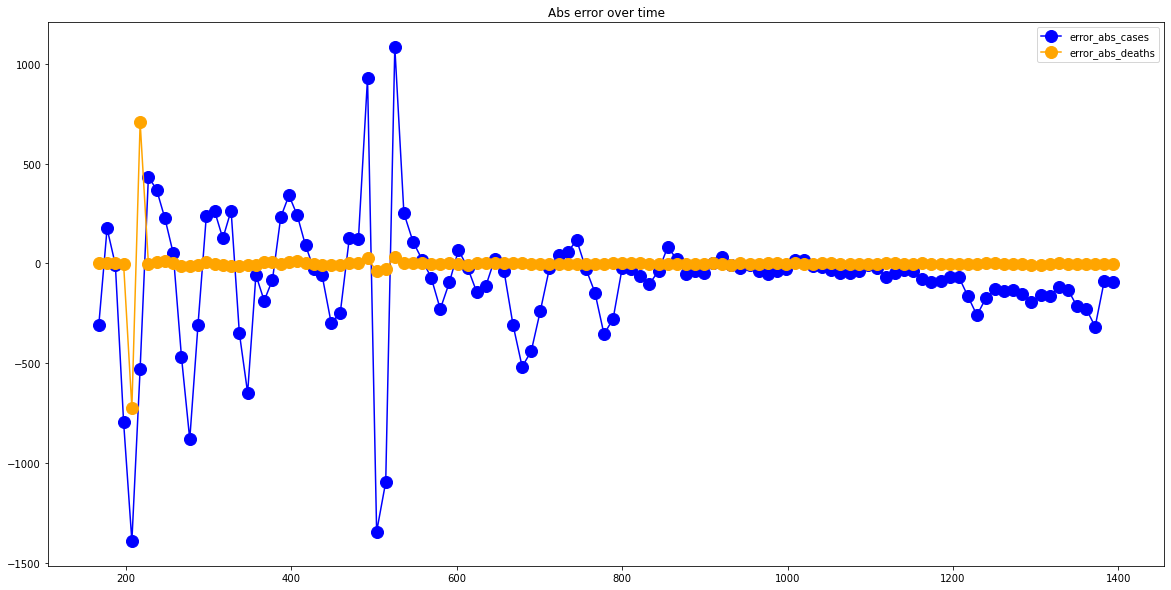

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12804.829545454546
RMSE =  17118.072771794567
-- Brazil performances for deaths --
MAE =  406.5113636363636
RMSE =  498.91943465125433


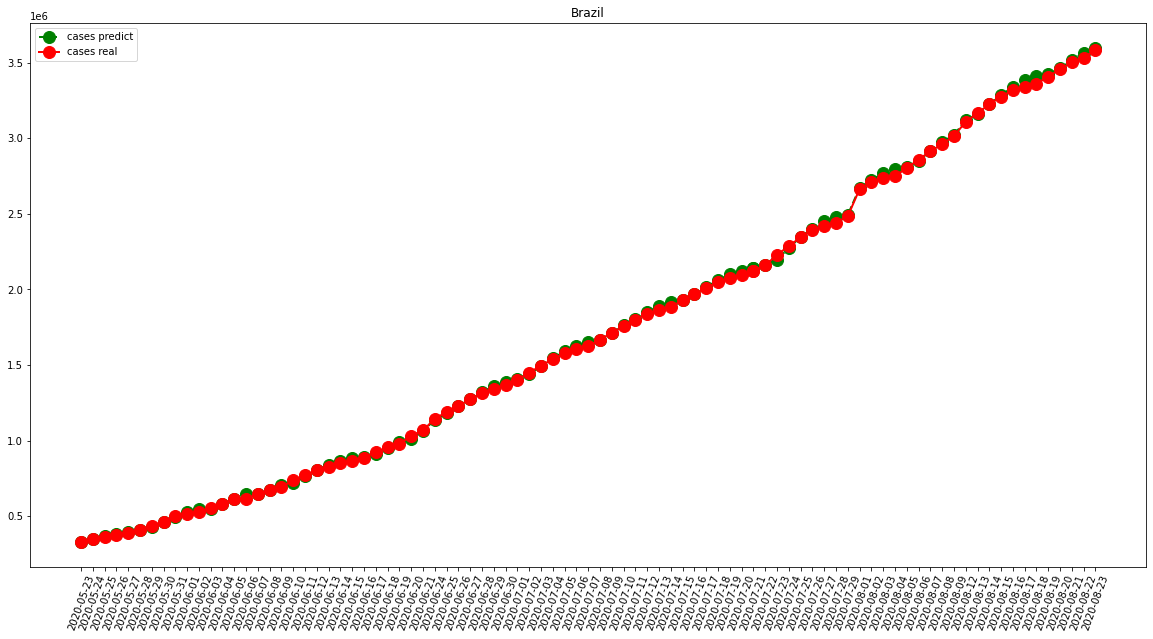

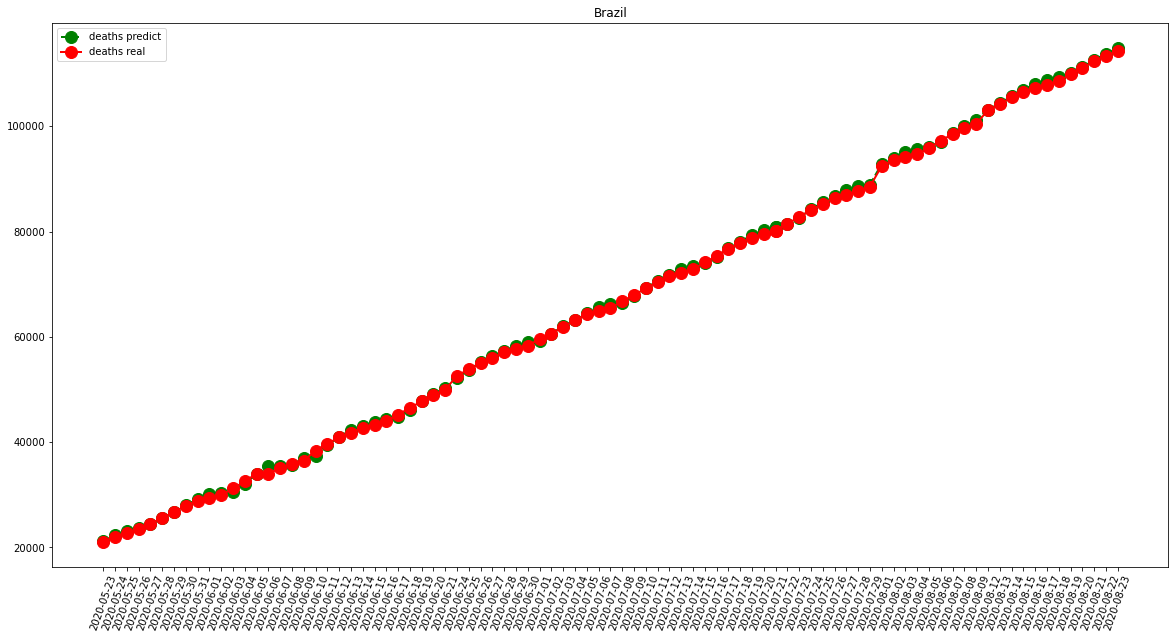

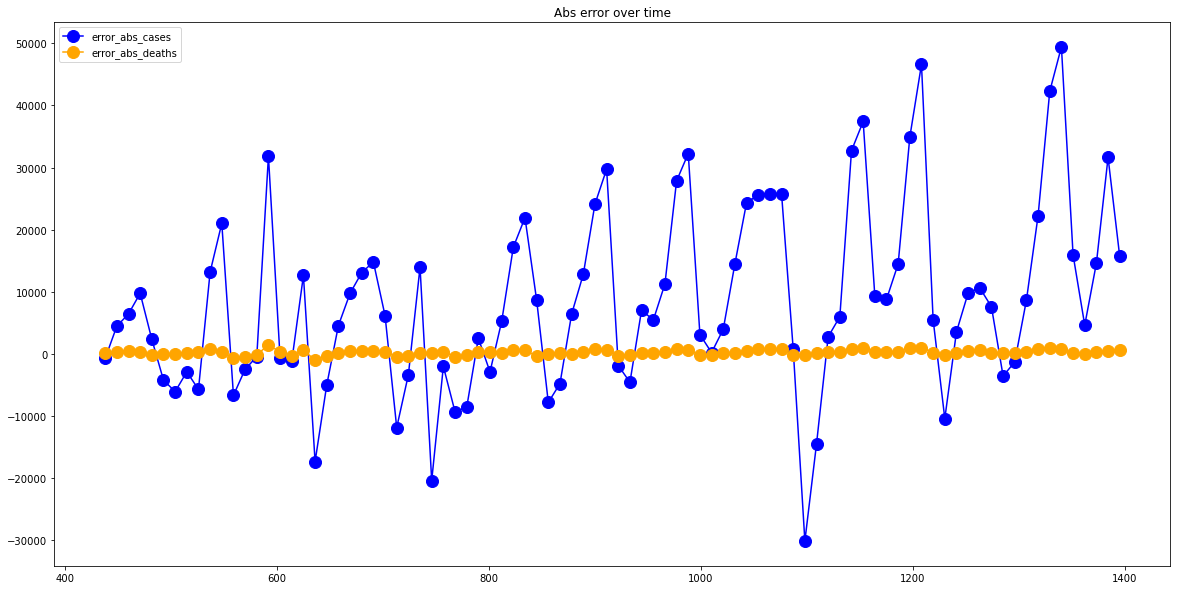

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)